In [1]:
import torch

print("CUDA Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device Name:", torch.cuda.get_device_name(0))
    print("CUDA Version:", torch.version.cuda)


CUDA Available: True
Device Name: NVIDIA GeForce RTX 3060 Laptop GPU
CUDA Version: 12.6


In [2]:
import pandas as pd 

data = pd.read_csv('../dataset/icml_face_data.csv')


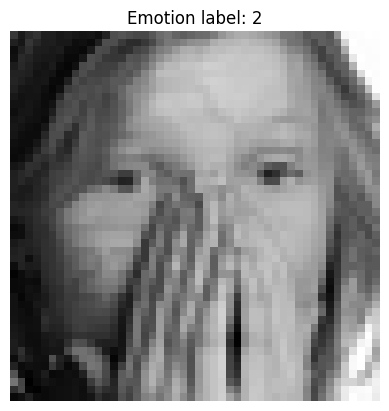

In [3]:
import numpy as np
import matplotlib.pyplot as plt
id = 45 
label = int(data.iloc[id]['emotion'])
pixel_seq = data.iloc[id, 2]
image = np.fromstring(pixel_seq, sep=' ', dtype=np.uint8).reshape(48, 48)

plt.imshow(image, cmap='gray')  # Show as grayscale
plt.title(f'Emotion label: {label}')
plt.axis('off')  # Hide axis ticks
plt.show()


In [1]:
import sys
sys.path.append("..")  # or "." depending on notebook location

import yaml 

with open("../cfgs/cnn_fer.yaml","r") as f:
    cfg = yaml.safe_load(f)


In [2]:
from utils.dataset import DataModule
from torchvision import transforms


# Define any transform (optional)
transform = transforms.Compose([
    transforms.Normalize(mean=[0.5], std=[0.5])
])
#cfg = cnn_fer.cfg
# Extract data config
data_cfg = cfg['data_args']

# Initialize data module
dm = DataModule(
    path=data_cfg['path'],
    transform=transform,
    batch_size=data_cfg['batch_size'],
    num_workers=data_cfg['num_workers'],
    shuffle=True,
    pin_memory=data_cfg['pin_memory']
)

# Get train loader
train_loader = dm.get_train_loader()

# Fetch one batch and inspect
for labels, images in train_loader:
    print(f"✅ Image batch shape: {images.shape}")   # Expected: (64, 1, 48, 48)
    print(f"✅ Labels shape: {labels.shape}")         # Expected: (64,)
    print(f"✅ Unique labels in batch: {labels.unique()}")
    break


✅ Image batch shape: torch.Size([1, 1, 48, 48])
✅ Labels shape: torch.Size([1])
✅ Unique labels in batch: tensor([3])


In [1]:
import sys
sys.path.append("..")  # or "." depending on notebook location

import yaml 
from utils.dataset import DataModule
from torchvision import transforms

with open("../cfgs/cnn_fer.yaml","r") as f:
    cfg = yaml.safe_load(f)
data_cfg = cfg['data_args']
dm = DataModule(
    path=data_cfg['path'],
    transform=None,
    batch_size=data_cfg['batch_size'],
    num_workers=data_cfg['num_workers'],
    shuffle=True,
    pin_memory=data_cfg['pin_memory']
)

In [2]:
from models.convnetfer_model import ConvNetFer
import torch.nn as nn

# cfg['model_args']['activation'] = eval( cfg['model_args']['activation'])  # e.g., 'nn.ReLU' → nn.ReLU
# cfg['model_args']['norm_layer'] = eval(cfg['model_args']['norm_layer'])
#model = eval(cfg['model_name'])(**cfg['model_args'])


In [3]:
train_loader = dm.get_train_loader()
eval_loader = dm.get_val_loader()

In [4]:
from trainers.cnn_trainer import CNNTrainer

cnn_trainer = CNNTrainer(config = cfg, log_dir='../log/',train_loader=train_loader,eval_loader=eval_loader)

In [5]:
cnn_trainer.model

ConvNetFer(
  (layers): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
    (4): Dropout(p=0.3, inplace=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (8): ReLU()
    (9): Dropout(p=0.3, inplace=False)
    (10): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): Dropout(p=0.3, inplace=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=100, bias=True)
    (1): LayerNorm

In [6]:
cnn_trainer.train()

  0% 0/28709 [00:38<?, ?it/s]

KeyboardInterrupt: 